# About Uber and Lyft.

Sometimes it is just convenient to leave the driving to someone else. This is just less stress, more mind space and one gets to use that time to do other things. Well, that is one of the ideas that grew and later became the concept behind Uber and Lyft.

Uber is a global company available in 69 countries and around 900 cities worldwide. Lyft, on the other hand, operates in about 644 cities in the US and 12 cities in Canada only. Yet, in the US, it’s the second-largest ridesharing company with a 31% market share.

# Importing libraries

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit


from sklearn.metrics import r2_score 
from sklearn.metrics import mean_squared_error 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df =  pd.read_csv('/content/drive/MyDrive/Data Sets/Project Feature engineer/Uber and Lyft Dataset.zip')

In [ ]:
df.head().T

,0,1,2,3,4
id,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,4bd23055-6827-41c6-b23b-3c491f24e74d,981a3613-77af-4620-a42a-0c0866077d1e,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,e0126e1f-8ca9-4f2e-82b3-50505a09db9a
timestamp,1544952607.89,1543284023.677,1543366822.198,1543553582.749,1543463360.223
hour,9,2,1,4,3
day,16,27,28,30,29
month,12,11,11,11,11
datetime,2018-12-16 09:30:07,2018-11-27 02:00:23,2018-11-28 01:00:22,2018-11-30 04:53:02,2018-11-29 03:49:20
timezone,America/New_York,America/New_York,America/New_York,America/New_York,America/New_York
source,Haymarket Square,Haymarket Square,Haymarket Square,Haymarket Square,Haymarket Square
destination,North Station,North Station,North Station,North Station,North Station
cab_type,Lyft,Lyft,Lyft,Lyft,Lyft


# EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [ ]:
df.isna().sum().sum()

55095

Rows having nulls 55095

Show data have nan values 

In [ ]:
nan_df = df[df.isna().any(axis=1)]
nan_df.head().T

,18,31,40,60,69
id,fa5fb705-03a0-4eb9-82d9-7fe80872f754,eee70d94-6706-4b95-a8ce-0e34f0fa8f37,7f47ff53-7cf2-4a6a-8049-83c90e042593,43abdbe4-ab9e-4f39-afdc-31cfa375dc25,80db1c49-9d51-4575-a4f4-1ec23b4d3e31
timestamp,1543673584.211,1543794776.318,1543523885.298,1544731816.318,1543583283.653
hour,14,23,20,20,13
day,1,2,29,13,30
month,12,12,11,12,11
datetime,2018-12-01 14:13:04,2018-12-02 23:52:56,2018-11-29 20:38:05,2018-12-13 20:10:16,2018-11-30 13:08:03
timezone,America/New_York,America/New_York,America/New_York,America/New_York,America/New_York
source,North End,Beacon Hill,North Station,North End,North End
destination,West End,South Station,Fenway,West End,Beacon Hill
cab_type,Uber,Uber,Uber,Uber,Uber


In [ ]:
# Drop nan values 
df.dropna(inplace=True)
df.isna().sum().sum()

0

## Visualization

In [ ]:
# show one row of datetime 
df['datetime'][0]

'2018-12-16 09:30:07'

In [ ]:
# show year 
df['year'] = df['datetime'].apply(lambda x : x.split('-')[0])
print('uniq years are ' , df['year'].unique() , '\n')


# df['months'] = df['datetime'].apply(lambda x : x.split('-')[1])
# print('uniq months are ' , df['months'].unique() , '\n')

# df['day and time'] = df['datetime'].apply(lambda x : x.split('-')[2])
# df['days'] = df['day and time'].apply(lambda x : x.split(' ')[0])
# print('uniq days are ' , df['day'].unique() , '\n')

# df['time'] = df['day and time'].apply(lambda x : x.split(' ')[1])
# df['hours'] = df['time'].apply(lambda x : x.split(':')[0])
# print('uniq hor are ' , df['hours'].unique() , '\n')

uniq years are  ['2018'] 



In [ ]:
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime,year
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000,2018
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600,2018
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000,2018
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800,2018
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800,2018


In [ ]:
df2 = df.groupby(by=['day','cab_type']).size().reset_index(name = 'count')
df2

,day,cab_type,count
0,1,Lyft,20289
1,1,Uber,21391
2,2,Lyft,19845
3,2,Uber,21453
4,3,Lyft,20021
5,3,Uber,21302
6,4,Lyft,5704
7,4,Uber,5923
8,9,Lyft,668
9,9,Uber,861


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='day', ylabel='count'>

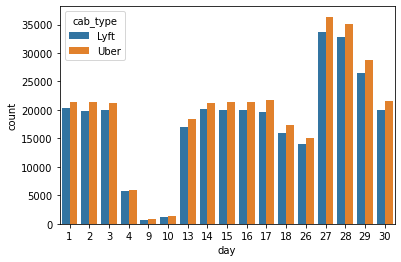

In [ ]:
sns.countplot(df['day'] ,  hue=df['cab_type'])

It seams that ther is no travels in all dayes such from 19 to 25 

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


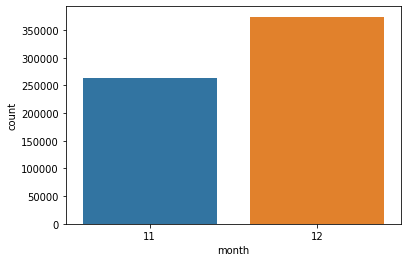

In [ ]:
sns.countplot(df['month'])
plt.show()

it seams that all travels in two monthes only 11 and 12

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hour', ylabel='count'>

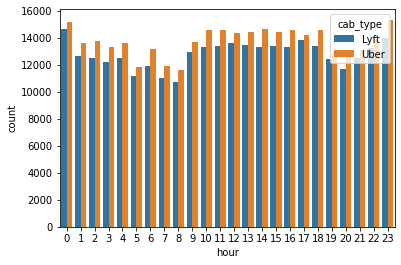

In [ ]:
sns.countplot(df['hour'] , hue=df['cab_type'])

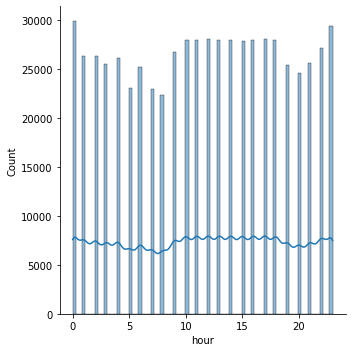

In [ ]:
sns.displot(df['hour'] , kde=True  )

It seams that there are traveles in all day's hour 

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


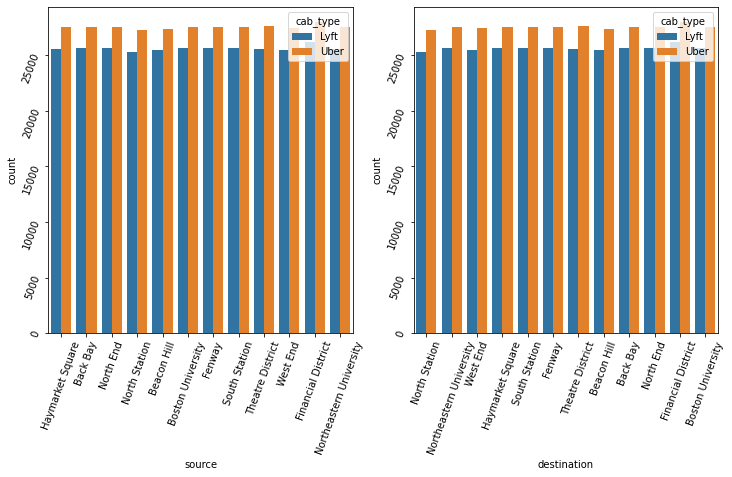

In [ ]:
fig , ax =  plt.subplots(1,2,figsize=(12,6))

sns.countplot(df['source'] ,ax = ax[0] ,  hue=df['cab_type'])
ax[0].tick_params(rotation=70)

sns.countplot(df['destination'] ,ax = ax[1]  , hue=df['cab_type'])

ax[1].tick_params(rotation=70)


In [ ]:
def plot_bar(groupby_column):
    df1 =df.groupby(groupby_column).size().reset_index(name="counts")
    print(df1)


In [ ]:
plot_bar('cab_type')

  cab_type  counts
0     Lyft  307408
1     Uber  330568


In [ ]:
df1 =df.groupby(df['cab_type']).size().reset_index(name="counts")
df1

# reset_index method is used to convert the result of the groupby operation from a Series to a DataFrame.

,cab_type,counts
0,Lyft,307408
1,Uber,330568


cab_type
Lyft    307408
Uber    330568
dtype: int64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


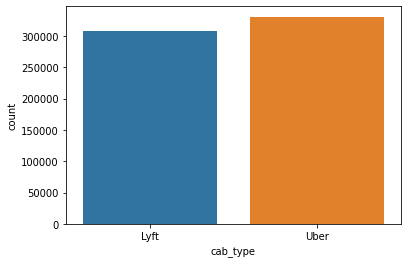

In [ ]:
df1 =df.groupby(df['cab_type']).size()
print(df1)
sns.countplot(df['cab_type'])
plt.show()


The agg method is then called on the GroupBy object to calculate the mean values of the "latitude" and "longitude" columns for each group. The argument to agg is a dictionary where the keys are the column names to be aggregated and the values are the aggregation functions to be applied to each column. In this case, the mean function is applied to both "latitude" and "longitude".

So the resulting DataFrame has rows corresponding to each unique combination of "destination" and "source", and columns for "latitude" and "longitude" showing the mean value for each group.

In [ ]:
df.groupby(by=["destination","source"]).agg({'latitude':'mean','longitude':'mean'})

latitude  longitude
destination source                                       
Back Bay    Boston University        42.336960 -71.066178
            Fenway                   42.337740 -71.065822
            Haymarket Square         42.337087 -71.065110
            North End                42.338100 -71.066343
            Northeastern University  42.336668 -71.065314
...                                        ...        ...
West End    Fenway                   42.338291 -71.066356
            Haymarket Square         42.339314 -71.066239
            North End                42.337212 -71.066268
            Northeastern University  42.340015 -71.066646
            South Station            42.338983 -71.066967

[72 rows x 2 columns]

In [ ]:
df['price'].max()


97.5

In [ ]:
df[df['price']==df['price'].max()]

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime,year
597071,ba1593a1-e4fd-4c7a-a011-e2d4fccbf081,1.543714e+09,1,2,12,2018-12-02 01:28:02,America/New_York,Financial District,Fenway,Lyft,...,1543683600,31.57,1543665600,44.65,1543690800,28.1,1543658400,43.98,1543690800,2018


In [ ]:
# source  destination  latitude and longitude of max price 

df[df['price'] == df['price'].max()][['source','destination','latitude','longitude']]

,source,destination,latitude,longitude
597071,Financial District,Fenway,42.3503,-71.081


In [ ]:
pd.set_option('display.max_rows', 72)

df.groupby(by=["destination","source"]).agg({'price': 'mean'})
# df.groupby(by=["source","destination"]).price.agg(["mean"])

price
destination             source                            
Back Bay                Boston University        13.992801
                        Fenway                   13.802155
                        Haymarket Square         16.860489
                        North End                19.550935
                        Northeastern University  13.698923
                        South Station            19.103822
Beacon Hill             Boston University        17.315535
                        Fenway                   16.796674
                        Haymarket Square         13.338559
                        North End                15.982630
                        Northeastern University  16.842433
                        South Station            17.276304
Boston University       Back Bay                 14.039392
                        Beacon Hill              16.376737
                        Financial District       25.498434
                        North Station            18.931558
                        Theatre District         20.360662
                        West End                 18.157165
Fenway                  Back Bay                 13.658752
                        Beacon Hill              16.158840
                        Financial District       23.404850
                        North Station            18.547603
                        Theatre District         19.069278
                        West End                 17.932692
Financial District      Boston University        24.146085
                        Fenway                   23.438818
                        Haymarket Square         12.731618
                        North End                13.417597
                        Northeastern University  22.582094
                        South Station            12.436910
Haymarket Square        Back Bay                 17.987384
                        Beacon Hill              13.799137
                        Financial District       13.188209
                        North Station            12.571791
                        Theatre District         15.204973
                        West End                 12.771290
North End               Back Bay                 19.473019
                        Beacon Hill              15.270942
                        Financial District       13.179635
                        North Station            13.106641
                        Theatre District         15.159646
                        West End                 13.370017
North Station           Boston University        20.185338
                        Fenway                   19.701839
                        Haymarket Square         12.332545
                        North End                12.824092
                        Northeastern University  19.910939
                        South Station            15.746736
Northeastern University Back Bay                 13.151040
                        Beacon Hill              16.471792
                        Financial District       21.918584
                        North Station            19.537848
                        Theatre District         16.910751
                        West End                 18.964969
South Station           Back Bay                 17.700711
                        Beacon Hill              15.950661
                        Financial District       12.349066
                        North Station            15.374198
                        Theatre District         12.888926
                        West End                 15.018255
Theatre District        Boston University        18.689557
                        Fenway                   18.232722
                        Haymarket Square         13.677272
                        North End                15.169406
                        Northeastern University  16.144805
                        South Station            13.952579
West End                Boston University

Make Adectionary that have price of specific source and destiantion

In [ ]:
dec_price = {(k,v):r for k,v,r in zip( df['destination'] , df['source'] , df['price'])}
dec_price

{('North Station', 'Haymarket Square'): 6.5,
 ('Northeastern University', 'Back Bay'): 7.5,
 ('West End', 'North End'): 27.5,
 ('Haymarket Square', 'North Station'): 7.0,
 ('South Station', 'Beacon Hill'): 13.0,
 ('Northeastern University', 'North Station'): 36.0,
 ('Fenway', 'North Station'): 16.5,
 ('South Station', 'North Station'): 8.0,
 ('West End', 'Haymarket Square'): 5.0,
 ('Theatre District', 'Haymarket Square'): 7.5,
 ('Beacon Hill', 'North End'): 8.5,
 ('Beacon Hill', 'Haymarket Square'): 7.0,
 ('North Station', 'Boston University'): 26.0,
 ('West End', 'Fenway'): 16.5,
 ('Back Bay', 'South Station'): 26.0,
 ('North Station', 'Fenway'): 11.0,
 ('North End', 'Theatre District'): 27.5,
 ('Northeastern University', 'West End'): 38.5,
 ('Back Bay', 'North End'): 19.5,
 ('Haymarket Square', 'Theatre District'): 27.0,
 ('Fenway', 'Beacon Hill'): 8.5,
 ('North End', 'Back Bay'): 25.5,
 ('North End', 'North Station'): 6.5,
 ('Haymarket Square', 'Financial District'): 13.5,
 ('Financ

In [ ]:
dec_price['Back Bay', 'Fenway']

3.0

# Feature Engineering

## 1. Removing Unnecessary Features

In [ ]:
# will make new data frame as may ne use in future 

new_df = df.drop(['id','timestamp','datetime','long_summary','apparentTemperatureHighTime','apparentTemperatureLowTime',
                  'apparentTemperatureLowTime','windGustTime','sunriseTime','sunsetTime','uvIndexTime','temperatureMinTime',
                 'temperatureMaxTime','apparentTemperatureMinTime','temperatureLowTime','apparentTemperatureMaxTime','visibility.1'],axis=1)

In [ ]:
new_df.shape

(637976, 42)

In [ ]:
new_df.columns

Index(['hour', 'day', 'month', 'timezone', 'source', 'destination', 'cab_type',
       'product_id', 'name', 'price', 'distance', 'surge_multiplier',
       'latitude', 'longitude', 'temperature', 'apparentTemperature',
       'short_summary', 'precipIntensity', 'precipProbability', 'humidity',
       'windSpeed', 'windGust', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'apparentTemperatureHigh',
       'apparentTemperatureLow', 'icon', 'dewPoint', 'pressure', 'windBearing',
       'cloudCover', 'uvIndex', 'ozone', 'moonPhase', 'precipIntensityMax',
       'temperatureMin', 'temperatureMax', 'apparentTemperatureMin',
       'apparentTemperatureMax', 'year'],
      dtype='object')

Our goal is to make linear regression model. First we check correlation between our features and target feature (price)
So, i want to check the correlation of our temperature related features with our target feature (Price)

## 2. Temp Features

In [ ]:
temp_cols= ['temperature','apparentTemperature','temperatureHigh','temperatureLow','apparentTemperatureHigh',
                'apparentTemperatureLow','temperatureMin','temperatureHighTime','temperatureMax','apparentTemperatureMin','apparentTemperatureMax','price']

In [ ]:
temp_df = new_df[temp_cols]

<AxesSubplot:>

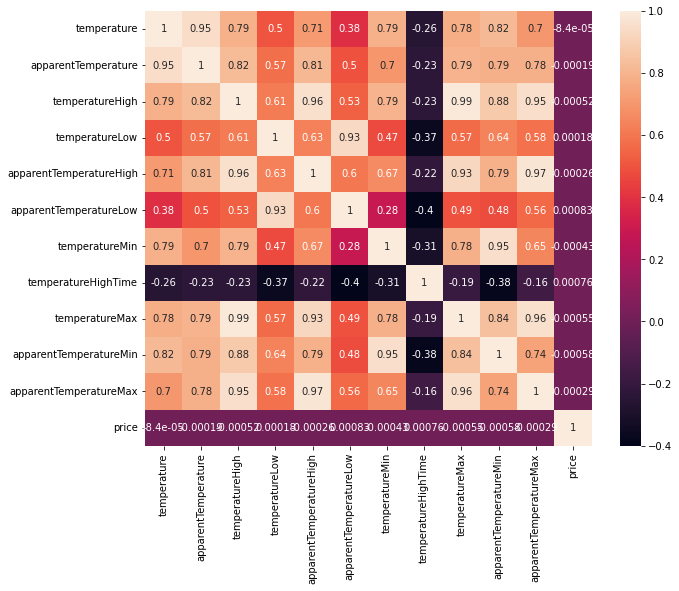

In [ ]:

plt.figure(figsize=(10,8))
sns.heatmap(temp_df.corr() , annot = True)

<AxesSubplot:>

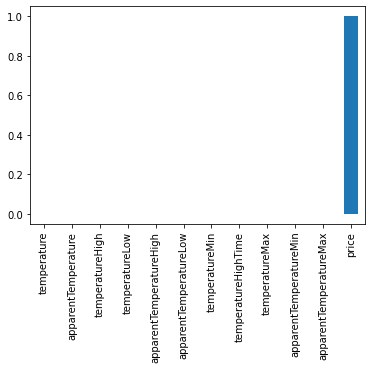

In [ ]:
temp_df.corr()['price']
temp_df.corr()['price'].plot.bar() 
#TypeError: bar() missing 1 required positional argument: 'height'

In [ ]:
temp_df.corr()['price']

temperature               -0.000084
apparentTemperature       -0.000193
temperatureHigh           -0.000516
temperatureLow             0.000182
apparentTemperatureHigh   -0.000261
apparentTemperatureLow     0.000831
temperatureMin            -0.000428
temperatureHighTime        0.000759
temperatureMax            -0.000550
apparentTemperatureMin    -0.000580
apparentTemperatureMax    -0.000290
price                      1.000000
Name: price, dtype: float64

Noticed that there are weak correlation between temp features and price 'target feature'
So will drop these features 

In [ ]:
new_df = new_df.drop( ['temperature','apparentTemperature','temperatureHigh','temperatureLow','apparentTemperatureHigh',
                'apparentTemperatureLow','temperatureMin','temperatureHighTime','temperatureMax','apparentTemperatureMin','apparentTemperatureMax'], axis=1)
new_df.shape

(637976, 31)

## 3.Other Climaye features

In [ ]:
climate_column = ['precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'visibility', 'dewPoint', 'pressure', 'windBearing',
       'cloudCover', 'uvIndex', 'ozone', 'moonPhase',
       'precipIntensityMax','price']

precipIntensity       0.000166
precipProbability    -0.000243
humidity             -0.001238
windSpeed             0.000990
windGust              0.001218
visibility            0.001497
dewPoint             -0.000615
pressure              0.000866
windBearing          -0.001382
cloudCover            0.000883
uvIndex              -0.000424
ozone                 0.000460
moonPhase            -0.001602
precipIntensityMax    0.001114
price                 1.000000
Name: price, dtype: float64


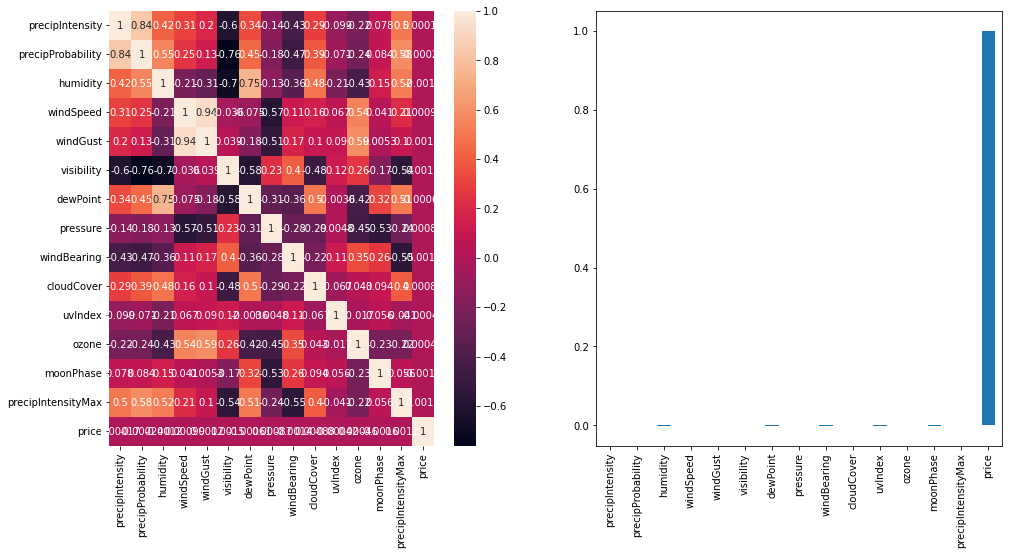

In [ ]:
cli_df = new_df[['precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'visibility', 'dewPoint', 'pressure', 'windBearing',
       'cloudCover', 'uvIndex', 'ozone', 'moonPhase',
       'precipIntensityMax','price']]
fig , ax = plt.subplots(1,2,figsize=(16,8))
sns.heatmap(cli_df.corr() , annot = True , ax = ax[0])
cli_df.corr()['price'].plot(kind='bar' , ax = ax[1])
print(cli_df.corr()['price'])

It seams that climate Feature have also weak correlation with target column ,So will drop them 

In [ ]:
new_df = new_df.drop(['precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'visibility', 'dewPoint', 'pressure', 'windBearing',
       'cloudCover', 'uvIndex', 'ozone', 'moonPhase',
       'precipIntensityMax'],axis=1)

In [ ]:
new_df.shape

(637976, 17)

In [ ]:
new_df.columns

Index(['hour', 'day', 'month', 'timezone', 'source', 'destination', 'cab_type',
       'product_id', 'name', 'price', 'distance', 'surge_multiplier',
       'latitude', 'longitude', 'short_summary', 'icon', 'year'],
      dtype='object')

## Catg Features 

In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 637976 entries, 0 to 693070
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   hour              637976 non-null  int64  
 1   day               637976 non-null  int64  
 2   month             637976 non-null  int64  
 3   timezone          637976 non-null  object 
 4   source            637976 non-null  object 
 5   destination       637976 non-null  object 
 6   cab_type          637976 non-null  object 
 7   product_id        637976 non-null  object 
 8   name              637976 non-null  object 
 9   price             637976 non-null  float64
 10  distance          637976 non-null  float64
 11  surge_multiplier  637976 non-null  float64
 12  latitude          637976 non-null  float64
 13  longitude         637976 non-null  float64
 14  short_summary     637976 non-null  object 
 15  icon              637976 non-null  object 
 16  year              63

In [ ]:
catg_cols = [i for i in new_df.columns if df[i].dtypes == 'object']
len(catg_cols)

9

In [ ]:
new_df.describe(include = ['object','category'])

,timezone,source,destination,cab_type,product_id,name,short_summary,icon,year
count,637976,637976,637976,637976,637976,637976,637976,637976,637976
unique,1,12,12,2,12,12,9,7,1
top,America/New_York,Financial District,Financial District,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,Overcast,cloudy,2018
freq,637976,54197,54192,330568,55096,55096,201429,201429,637976


* timezone and year have one unique value so will drop this two column 

In [ ]:
print(new_df['product_id'].unique())
print('\n',new_df['product_id'].value_counts())

['lyft_line' 'lyft_premier' 'lyft' 'lyft_luxsuv' 'lyft_plus' 'lyft_lux'
 '6f72dfc5-27f1-42e8-84db-ccc7a75f6969'
 '6c84fd89-3f11-4782-9b50-97c468b19529'
 '55c66225-fbe7-4fd5-9072-eab1ece5e23e'
 '9a0e7b09-b92b-4c41-9779-2ad22b4d779d'
 '6d318bcc-22a3-4af6-bddd-b409bfce1546'
 '997acbb5-e102-41e1-b155-9df7de0a73f2']

 6f72dfc5-27f1-42e8-84db-ccc7a75f6969    55096
9a0e7b09-b92b-4c41-9779-2ad22b4d779d    55096
6d318bcc-22a3-4af6-bddd-b409bfce1546    55096
6c84fd89-3f11-4782-9b50-97c468b19529    55095
55c66225-fbe7-4fd5-9072-eab1ece5e23e    55094
997acbb5-e102-41e1-b155-9df7de0a73f2    55091
lyft_premier                            51235
lyft                                    51235
lyft_luxsuv                             51235
lyft_plus                               51235
lyft_lux                                51235
lyft_line                               51233
Name: product_id, dtype: int64


* Product id have unidentified values so will remove it 

In [ ]:
new_df = new_df.drop(['product_id' , 'year' ,'timezone'] , axis =1)
new_df.shape

(637976, 14)

In [ ]:
catg_cols = [i for i in new_df.columns if df[i].dtypes == 'object']
len(catg_cols)

6

I want To see correlation of these 6 categorical features with target columns 
* So i will apply one labelencoding and then test corr

> Indented block



In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()

In [ ]:
cat_fe= [i for i in new_df.columns  if new_df[i].dtypes =='object']
cat_fe

['source', 'destination', 'cab_type', 'name', 'short_summary', 'icon']

In [ ]:


categ_df = new_df[cat_fe]
for col in cat_fe :
  categ_df[col] = le.fit_transform(categ_df[col])
categ_df

<ipython-input-52-64ba64d98c71>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categ_df[col] = le.fit_transform(categ_df[col])


,source,destination,cab_type,name,short_summary,icon
0,5,7,0,7,4,5
1,5,7,0,2,8,6
2,5,7,0,5,0,1
3,5,7,0,4,0,1
4,5,7,0,6,6,5
...,...,...,...,...,...,...
693065,11,6,1,11,6,5
693066,11,6,1,10,6,5
693067,11,6,1,9,6,5
693069,11,6,1,1,6,5


Adding Price column to categ_df To check correlation 

In [ ]:
categ_df['price']=new_df['price']
categ_df

<ipython-input-53-bb4849773a8a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categ_df['price']=new_df['price']


,source,destination,cab_type,name,short_summary,icon,price
0,5,7,0,7,4,5,5.0
1,5,7,0,2,8,6,11.0
2,5,7,0,5,0,1,7.0
3,5,7,0,4,0,1,26.0
4,5,7,0,6,6,5,9.0
...,...,...,...,...,...,...,...
693065,11,6,1,11,6,5,9.5
693066,11,6,1,10,6,5,13.0
693067,11,6,1,9,6,5,9.5
693069,11,6,1,1,6,5,27.0


source          -0.025366
destination     -0.046320
cab_type        -0.083385
name            -0.586644
short_summary    0.001245
icon             0.002100
price            1.000000
Name: price, dtype: float64


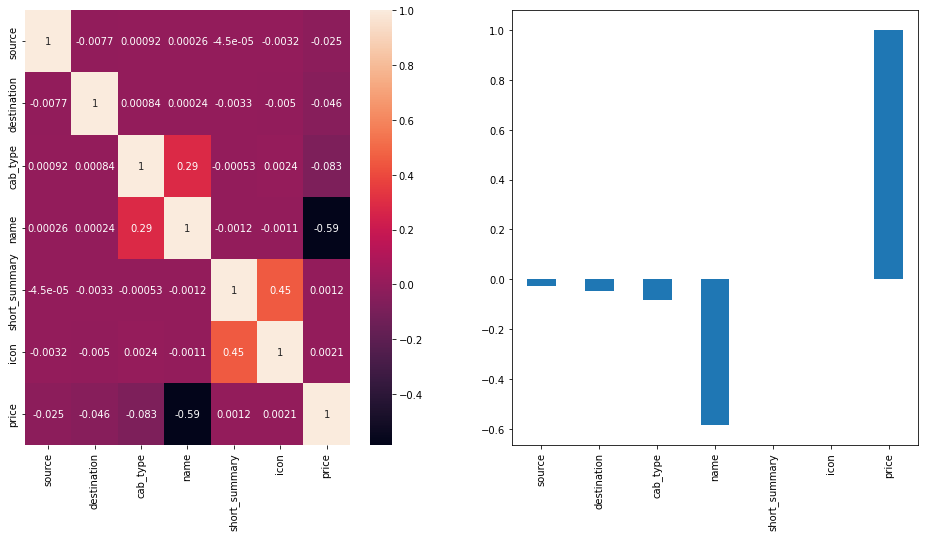

In [ ]:

fig , ax = plt.subplots(1,2,figsize=(16,8))
sns.heatmap(categ_df.corr() , annot = True , ax = ax[0])
categ_df.corr()['price'].plot(kind='bar' , ax = ax[1])
print(categ_df.corr()['price'])

We can see only name feature that has a relatively strong correlation. Source,destination, and cab_type features have relatively weak correlation, but i will pick cab_type feature because it has stronger correlation than other two features. I will drop or remove the rest of the columns

In [ ]:
new_df = new_df.drop(['source','destination','short_summary','icon'],axis=1)
new_df.head()

,hour,day,month,cab_type,name,price,distance,surge_multiplier,latitude,longitude
0,9,16,12,Lyft,Shared,5.0,0.44,1.0,42.2148,-71.033
1,2,27,11,Lyft,Lux,11.0,0.44,1.0,42.2148,-71.033
2,1,28,11,Lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033
3,4,30,11,Lyft,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033
4,3,29,11,Lyft,Lyft XL,9.0,0.44,1.0,42.2148,-71.033


Other features correlation hour , day , month , longitude and atitude 

month        0.000913
day         -0.000722
hour         0.000561
latitude     0.002088
longitude   -0.001417
price        1.000000
Name: price, dtype: float64


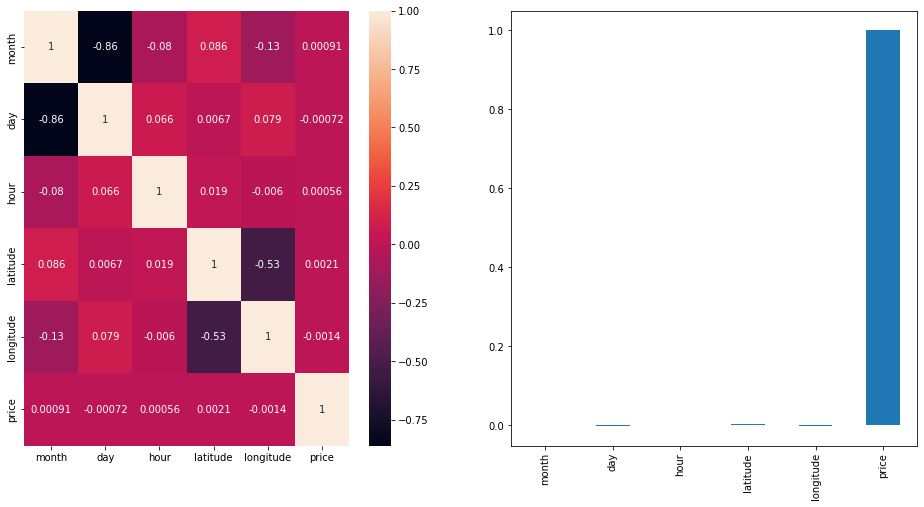

In [ ]:
other_feat = ['month' , 'day' , 'hour' , 'latitude' ,'longitude' , 'price']
other_feat_df = new_df[other_feat]

fig , ax = plt.subplots(1,2,figsize=(16,8))
sns.heatmap(other_feat_df.corr() , annot = True , ax = ax[0])
other_feat_df.corr()['price'].plot(kind='bar' , ax = ax[1])
print(other_feat_df.corr()['price'])

There are weak correlation so i will remove this features 

In [ ]:
new_df = new_df.drop(other_feat ,axis=1)
new_df


,cab_type,name,distance,surge_multiplier
0,Lyft,Shared,0.44,1.0
1,Lyft,Lux,0.44,1.0
2,Lyft,Lyft,0.44,1.0
3,Lyft,Lux Black XL,0.44,1.0
4,Lyft,Lyft XL,0.44,1.0
...,...,...,...,...
693065,Uber,WAV,1.00,1.0
693066,Uber,UberXL,1.00,1.0
693067,Uber,UberX,1.00,1.0
693069,Uber,Black SUV,1.00,1.0


Adding price column as it deopped 

In [ ]:
new_df['price'] = df['price']
new_df

,cab_type,name,distance,surge_multiplier,price
0,Lyft,Shared,0.44,1.0,5.0
1,Lyft,Lux,0.44,1.0,11.0
2,Lyft,Lyft,0.44,1.0,7.0
3,Lyft,Lux Black XL,0.44,1.0,26.0
4,Lyft,Lyft XL,0.44,1.0,9.0
...,...,...,...,...,...
693065,Uber,WAV,1.00,1.0,9.5
693066,Uber,UberXL,1.00,1.0,13.0
693067,Uber,UberX,1.00,1.0,9.5
693069,Uber,Black SUV,1.00,1.0,27.0


## Outliers

In [ ]:
# sns.boxplot(new_df)

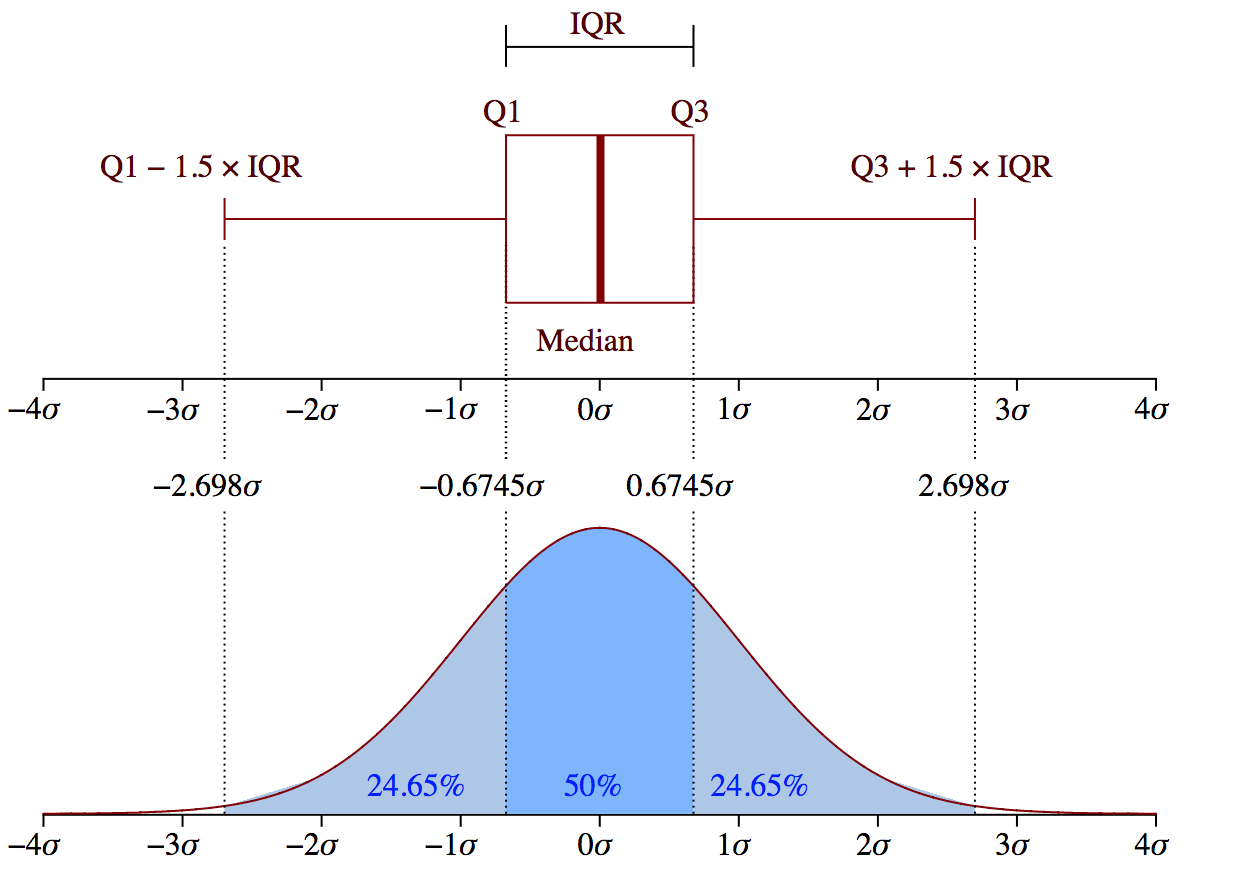

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

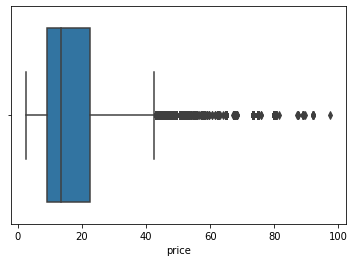

In [ ]:
sns.boxplot(new_df['price'])

Checking Norman Range of data distribution IQR interqARTILE RANGE 

In [ ]:
q1 = new_df['price'].quantile(0.25)
q3 = new_df['price'].quantile(0.75)
print(q1)
print(q3)

iqr = q3-q1
print(iqr)

9.0
22.5
13.5


In [ ]:
#lower outlier 

outl = q1 - (1.5*iqr)
print(outl)
outh = q3 + (1.5*iqr)
print(outh)

-11.25
42.75


In [ ]:
new_df[ new_df['price']< outl ]

,cab_type,name,distance,surge_multiplier,price


There is no outlier under Q1 

In [ ]:
outlier_df = new_df[new_df['price'] > outh]

there are 5589 rows of outlier you can drop or remove 

In [ ]:

print(' shape before droping outliers ' , new_df.shape)
f_df =  new_df[~(new_df['price'] > outh)]
print(' shape after droping outliers ' , f_df.shape)


 shape before droping outliers  (637976, 5)
 shape after droping outliers  (632387, 5)


#  Model 

This is Final Data set will model deal with 

In [ ]:
f_df

,cab_type,name,distance,surge_multiplier,price
0,Lyft,Shared,0.44,1.0,5.0
1,Lyft,Lux,0.44,1.0,11.0
2,Lyft,Lyft,0.44,1.0,7.0
3,Lyft,Lux Black XL,0.44,1.0,26.0
4,Lyft,Lyft XL,0.44,1.0,9.0
...,...,...,...,...,...
693065,Uber,WAV,1.00,1.0,9.5
693066,Uber,UberXL,1.00,1.0,13.0
693067,Uber,UberX,1.00,1.0,9.5
693069,Uber,Black SUV,1.00,1.0,27.0


In [ ]:
f_df.describe(include='object')

,cab_type,name
count,632387,632387
unique,2,12
top,Uber,WAV
freq,329071,55095


So after aopplying one hot encoding we wiil have 12 columns from name column and 2 columns from cab_tybe column 

Total coulumns we will have 12+2+distance+price+surge_multiplier = 17 

Applying one hot encoding befor model

In [ ]:
one_hot_encoded_df = pd.get_dummies(f_df, columns=['cab_type', 'name'])
one_hot_encoded_df

,distance,surge_multiplier,price,cab_type_Lyft,cab_type_Uber,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV
0,0.44,1.0,5.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0.44,1.0,11.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0.44,1.0,7.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0.44,1.0,26.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0.44,1.0,9.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693065,1.00,1.0,9.5,0,1,0,0,0,0,0,0,0,0,0,0,0,1
693066,1.00,1.0,13.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
693067,1.00,1.0,9.5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
693069,1.00,1.0,27.0,0,1,0,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
mod_df = one_hot_encoded_df.copy()

Data splitting to x and y 

In [ ]:
x = mod_df.drop('price' , axis =1 )
y = mod_df['price']
x_train,x_test,y_train,y_test = train_test_split(x ,  y , test_size= 0.3 , random_state = 0)


In [ ]:
x_test.shape

(189717, 16)

Tranditional Linear Model

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [ ]:
model = lr.fit(x_train , y_train )

In [ ]:
y_predict =  model.predict(x_test)
y_predict

array([30.69455356, 37.477532  ,  8.28906823, ..., 13.09493064,
        9.0913213 , 15.45465112])

## Traditional model Evaluation 

In [ ]:
r2_scor_eval , mse , rmse =  r2_score(y_test,y_predict) ,  mean_squared_error(y_test,y_predict) , np.sqrt(mean_squared_error(y_test,y_predict))
print ( ' r2_scor_eval is : ' , r2_scor_eval)
print ( ' mse is : ' , mse)
print ( ' rmse is : ' , rmse)


 r2_scor_eval is :  0.9337789051792855
 mse is :  5.108383101703266
 rmse is :  2.2601732459489177


## Finding Best model

In [ ]:
def find_best_model (x,y):


  algos = { 'linearregression':{'model' : LinearRegression() ,
                                'params' : {'normalize': [True, False]}} 
           ,'lasso':{'model':Lasso(),
                    'params':{'alpha': [1,2],
                              'selection': ['random', 'cyclic']}} 
           ,'decision_tree':{'model':DecisionTreeRegressor(),
                            'params':{'criterion' : ['mse','friedman_mse'],
                                    'splitter': ['best','random']}}
           ,'random forest':{'model':RandomForestRegressor(),
                            'params':{'n_estimators' : [100, 150] ,
                                    'max_depth':[ 5, 7]}}}


  scores = []
  cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)

  for alg , param in algos.items():
    gs = GridSearchCV(param['model'] , param['params'] , cv = cv  , return_train_score = False)
    gs.fit(x,y)

    scores.append({
        'model': alg,
        'best score' : gs.best_score_ ,
        'best parama' : gs.best_params_

       })

  
  return pd.DataFrame(scores,columns=['model','best score','best parama'])



import warnings
warnings.filterwarnings('ignore')

find_best_model (x,y)




,model,best score,best parama
0,linearregression,0.933465,{'normalize': False}
1,lasso,0.211560,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.964468,"{'criterion': 'mse', 'splitter': 'best'}"
3,random forest,0.904027,"{'max_depth': 7, 'n_estimators': 150}"


So Decision Treen have high accuracy 